In [1]:
import pandas as pd
import warnings
import sys
sys.path.append('../../')
from src.preparation.data import Data
from src.modeling.AverageByIdModel import AverageByIdModel
from src.modeling.AverageModel import AverageModel
from src.modeling.DampedBaselineModel import DampedBaselineModel
from src.modeling.BaselineItemCF import BaselineItemCFModel
from src.modeling.BaselineUserCF import BaselineUserCFModel
from src.modeling.KNNCFModel import KNNRecommender
from src.modeling.Content_based import ContentBased
from src.modeling.ALS import ALSRecommender
from src.modeling.Models import Models

warnings.filterwarnings('ignore')

In [2]:
training_b, testing_b = Data.get_datasets_b()

In [3]:
models = {}
# models.update({ 'AverageOnly': AverageModel()})
# models.update({'AverageMovieID': AverageByIdModel('movie_id')})
# models.update({'AverageUserID': AverageByIdModel('user_id')})
models.update({'RegularisedBaseline': DampedBaselineModel(damping_factor=10)})

# THE ONE THAT TAKES REALLY LONG.
models.update({'Genre CB:': ContentBased()})
models.update({'KNN CF': KNNRecommender(k=10, baseline_algo=DampedBaselineModel(damping_factor=10))})
models.update({'ALS': ALSRecommender(baseline_algo=DampedBaselineModel(damping_factor=10))})
models.update({'Item CF': BaselineItemCFModel()})
models.update({'User CF': BaselineUserCFModel()})

In [4]:
model = Models(models)

In [5]:
rmses, recalls = model.evaluate_no_split(training_b, testing_b)

RegularisedBaseline
RMSE : 0.99 Recall : 0.66  Time Taken : 8.68
Genre CB:
RMSE : 1.16 Recall : 0.55  Time Taken : 186.12
KNN CF
RMSE : 0.96 Recall : 0.66  Time Taken : 10.1
ALS
RMSE : 0.97 Recall : 0.67  Time Taken : 12.73
Item CF
RMSE : 0.96 Recall : 0.49  Time Taken : 25.03
User CF
RMSE : 1.17 Recall : 0.52  Time Taken : 117.68


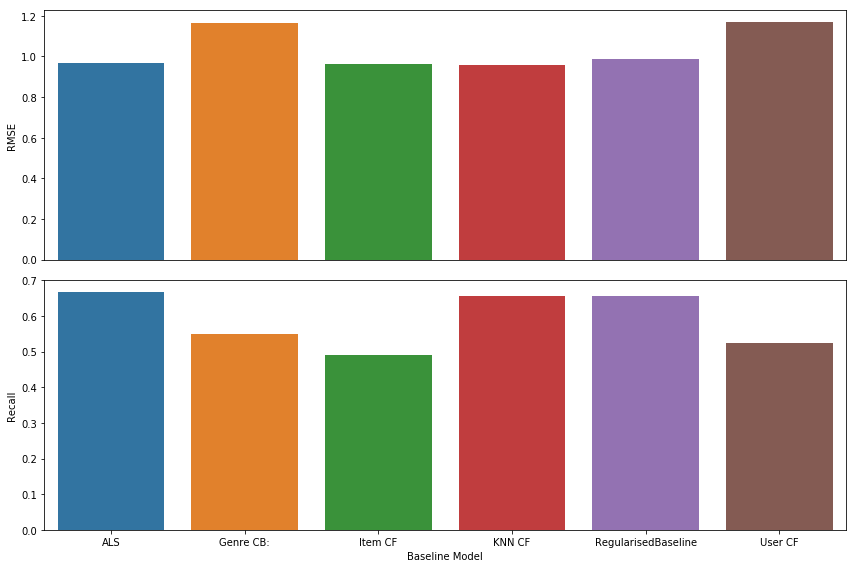

In [6]:
model.plot_no_split(rmses, recalls)